In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
carro = pd.read_csv('/content/C+¦pia de CarPrice_Assignment.csv')

In [ ]:
carro

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#ALTERANDO AS VARIÁVEIS CATEGÓRICAS

In [ ]:
le.fit(carro.CarName)
carro.CarName = le.transform(carro.CarName)

le.fit(carro.fueltype)
carro.fueltype = le.transform(carro.fueltype)

le.fit(carro.aspiration)
carro.aspiration = le.transform(carro.aspiration)

le.fit(carro.doornumber)
carro.doornumber = le.transform(carro.doornumber)

le.fit(carro.carbody)
carro.carbody = le.transform(carro.carbody)

le.fit(carro.drivewheel)
carro.drivewheel = le.transform(carro.drivewheel)

le.fit(carro.fuelsystem)
carro.fuelsystem = le.transform(carro.fuelsystem)

le.fit(carro.enginelocation)
carro.enginelocation = le.transform(carro.enginelocation)

le.fit(carro.enginetype)
carro.enginetype = le.transform(carro.enginetype)

le.fit(carro.cylindernumber)
carro.cylindernumber = le.transform(carro.cylindernumber)

In [ ]:
carro.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


#ANÁLISE EXPLORATÓRIA

<Axes: xlabel='price', ylabel='Count'>

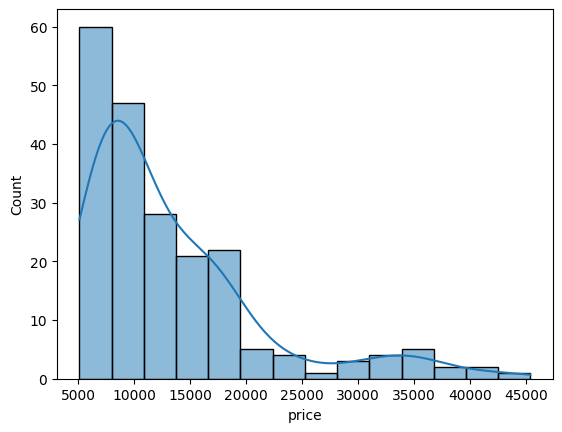

In [ ]:
sns.histplot(carro, x ='price', kde =True)

<Axes: xlabel='doornumber', ylabel='Count'>

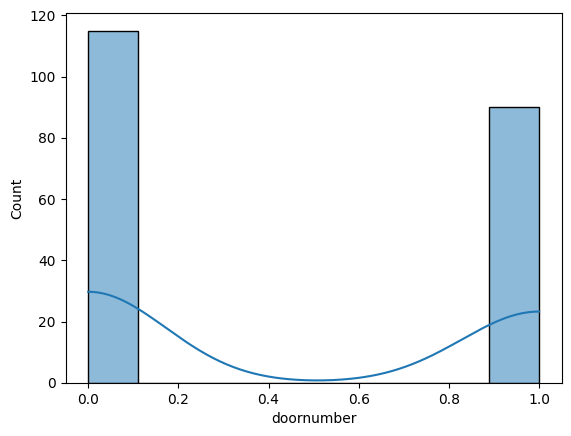

In [ ]:
sns.histplot(carro, x = 'doornumber', kde = True)

# NORMALIZAÇÃO DOS DADOS

In [ ]:
carro.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
carro_norm = pd.DataFrame(scaler.fit_transform(carro), index = carro.index, columns = carro.columns)

In [ ]:
carro_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#MODELO OLS

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
carro_norm.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
function = 'price~symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.26e-76
Time:                        17:37:40   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

#REMOVENDO FUELTYPE

In [ ]:
function = 'price~symboling+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.50
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.70e-77
Time:                        17:38:22   Log-Likelihood:                 275.55
No. Observations:                 205   AIC:                            -503.1
Df Residuals:                     181   BIC:                            -423.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0960      0.077  

#REMOVENDO carlength           

In [ ]:
function = 'price~symboling+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.02
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           3.26e-78
Time:                        17:38:55   Log-Likelihood:                 275.50
No. Observations:                 205   AIC:                            -505.0
Df Residuals:                     182   BIC:                            -428.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1000      0.076  

#REMOVENDO symboling            

In [ ]:
function = 'price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     76.89
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           3.76e-79
Time:                        17:39:26   Log-Likelihood:                 275.47
No. Observations:                 205   AIC:                            -506.9
Df Residuals:                     183   BIC:                            -433.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.071  

#REMOVENDO fuelsystem

In [ ]:
function = 'price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     81.06
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           4.63e-80
Time:                        17:40:05   Log-Likelihood:                 275.34
No. Observations:                 205   AIC:                            -508.7
Df Residuals:                     184   BIC:                            -438.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0872      0.069  

#REMOVENDO cylindernumber

In [ ]:
function = 'price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     85.65
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           5.66e-81
Time:                        17:41:06   Log-Likelihood:                 275.18
No. Observations:                 205   AIC:                            -510.4
Df Residuals:                     185   BIC:                            -443.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0777      0.067  

#REMOVENDO citympg

In [ ]:
function = 'price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     90.68
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           7.09e-82
Time:                        17:42:12   Log-Likelihood:                 274.97
No. Observations:                 205   AIC:                            -511.9
Df Residuals:                     186   BIC:                            -448.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0812      0.067  

# REMOVENDO aspiration           

In [ ]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     96.35
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           8.32e-83
Time:                        17:42:47   Log-Likelihood:                 274.79
No. Observations:                 205   AIC:                            -513.6
Df Residuals:                     187   BIC:                            -453.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0773      0.066  

# REMOVENDO highwaympg

In [ ]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.02e-83
Time:                        17:44:28   Log-Likelihood:                 274.54
No. Observations:                 205   AIC:                            -515.1
Df Residuals:                     188   BIC:                            -458.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0455      0.047  

#REMOVENDO ENGINETYPE

In [ ]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.43e-84
Time:                        17:45:34   Log-Likelihood:                 274.09
No. Observations:                 205   AIC:                            -516.2
Df Residuals:                     189   BIC:                            -463.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0316      0.044  

#REMOVENDO INTERCEPT

In [ ]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm - 1'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              238.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):                   2.35e-114
Time:                        17:47:38   Log-Likelihood:                          273.81
No. Observations:                 205   AIC:                                     -517.6
Df Residuals:                     190   BIC:                                     -467.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#REMOVENDO boreratio           

In [ ]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm - 1'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              238.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):                   2.35e-114
Time:                        17:48:44   Log-Likelihood:                          273.81
No. Observations:                 205   AIC:                                     -517.6
Df Residuals:                     190   BIC:                                     -467.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#REMOVENDO wheelbase

In [ ]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm - 1'
model = smf.ols(formula = function, data=carro_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):                   5.21e-116
Time:                        17:49:20   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#COMEÇAR A TREINAR O MODELO

##SEPARANDO AS VARIÁVEIS

In [ ]:
x = carro_norm[['CarName', 'doornumber','carbody','drivewheel','enginelocation','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm']]
y = carro_norm[['price']]

##TREINAMENTO

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

##PORCENTAGEM DE PREDIÇÃO PÓS TREINO

In [ ]:
r_sqr = lr.score(x,y)
r_sqr

0.8957104217461449

##QUANTO ESTAMOS ERRANDO NO TREINO

In [ ]:
y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino ))
print("MSE:", metrics.mean_squared_error(y_treino, y_pred_treino ))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino )))

MAE: 0.04760097445950692
MSE: 0.0036269034049875182
RMSE: 0.06022377773759728


##QUANTO ESTAMOS ERRANDO NA PREDIÇÃO REAL

In [ ]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste, y_pred_teste ))
print("MSE:", metrics.mean_squared_error(y_teste, y_pred_teste ))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste )))

MAE: 0.04885199554631912
MSE: 0.005901961267238038
RMSE: 0.07682422318017956
